# Example of plotting sampled values on a FITS image

In [1]:
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits

In [2]:
sspcols = ['Name','ix','iy','ra_abs','dec_abs','sigstar_sm']
ssptab = EdgeTable('NGC4047.pipe3d.hdf5', path='SSP_sm', cols=sspcols)
ssptab

Name,ix,iy,ra_abs,dec_abs,sigstar_sm
,,,deg,deg,solMass / pc2
bytes10,int32,int32,float32,float32,float32
NGC4047,1,1,180.737717,48.618690,nan
NGC4047,1,4,180.737717,48.619526,nan
NGC4047,1,7,180.737717,48.620358,nan
NGC4047,1,10,180.737717,48.621193,nan
NGC4047,1,13,180.737717,48.622025,nan
NGC4047,1,16,180.737732,48.622860,nan
NGC4047,1,19,180.737732,48.623692,nan
NGC4047,1,22,180.737732,48.624523,nan


Changed DATE-OBS from '01/03/55          ' to '1955-03-01''. [astropy.wcs.wcs]


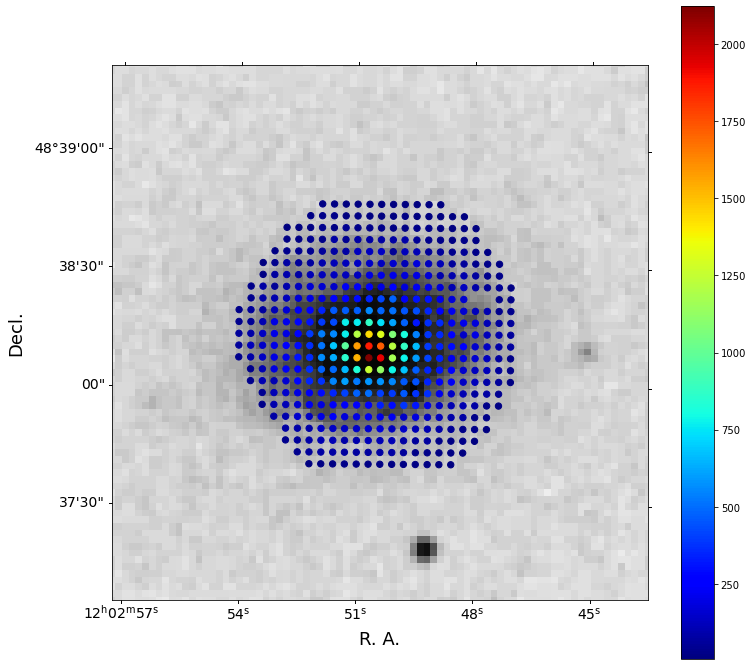

In [3]:
fig = plt.figure(figsize=(12,12))
fits_url = 'http://ned.ipac.caltech.edu/uri/NED::Image/fits/1994DSS...1...0000:/Bf/NGC_4047:I:103aE:dss1'
hdu = fits.open(fits_url)[0]
wcs = WCS(hdu.header)
ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap='binary')
dot = ax.scatter(ssptab['ra_abs'], ssptab['dec_abs'], c=ssptab['sigstar_sm'],
                 cmap='jet', transform=ax.get_transform('fk5'), s=40)
# Zoom in a little
ax.set_xlim([50,130])
ax.set_ylim([50,130])
ax.set_xlabel('R. A.', size=18)
ax.set_ylabel('Decl.', size=18)
ax.coords[0].set_ticklabel(size=14)
ax.coords[1].set_ticklabel(size=14)
fig.colorbar(dot, orientation='vertical')